In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline 
sns.set(color_codes=True)

In [78]:
df_train = pd.read_csv('train_wine.csv')
df_test = pd.read_csv('test_wine.csv')
df_ss = pd.read_csv('sample_submission.csv')

df = df_train.copy()

In [42]:
df_train.head()

,id,class,color,vineyard,fixed.acidity,acid.sulfur,volatile.acidity,sulfur.taste,citric.acid,residual.sugar,...,chlor.class,free.sulfur.dioxide,condition,total.sulfur.dioxide,density,pH,acid.taste,sulphates,acidity.variance,alcohol
0,1,medium,red,E,9.5,3.559427,0.59,2.411605,0.44,2.3,...,e2,21.0,I1,68.0,0.99920,3.46,2.67,0.63,0.24,9.5
1,2,good,red,C,6.4,3.131123,0.57,1.752449,0.12,2.3,...,g1,25.0,I1,36.0,0.99519,3.47,2.09,0.71,0.24,11.3
2,3,good,white,C,6.3,2.893981,0.23,2.299379,0.33,6.9,...,e3,23.0,I2,118.0,0.99380,3.23,2.34,0.46,0.24,10.4
3,4,good,red,D,7.2,2.311189,0.37,2.293916,0.32,2.0,...,i2,15.0,S1,28.0,0.99470,3.23,1.67,0.73,0.24,11.3
4,5,medium,white,E,5.9,3.185586,0.44,3.215821,0.33,1.2,...,d2,12.0,I1,117.0,0.99134,3.46,2.51,0.44,0.24,11.5


In [99]:
df_train.dtypes

id                        int64
class                    object
color                    object
vineyard                 object
fixed.acidity           float64
acid.sulfur             float64
volatile.acidity        float64
sulfur.taste            float64
citric.acid             float64
residual.sugar          float64
chlorides               float64
chlor.class              object
free.sulfur.dioxide     float64
condition                object
total.sulfur.dioxide    float64
density                 float64
pH                      float64
acid.taste              float64
sulphates               float64
acidity.variance        float64
alcohol                 float64
dtype: object

Index(['class', 'color', 'vineyard', 'chlor.class', 'condition'], dtype='object')

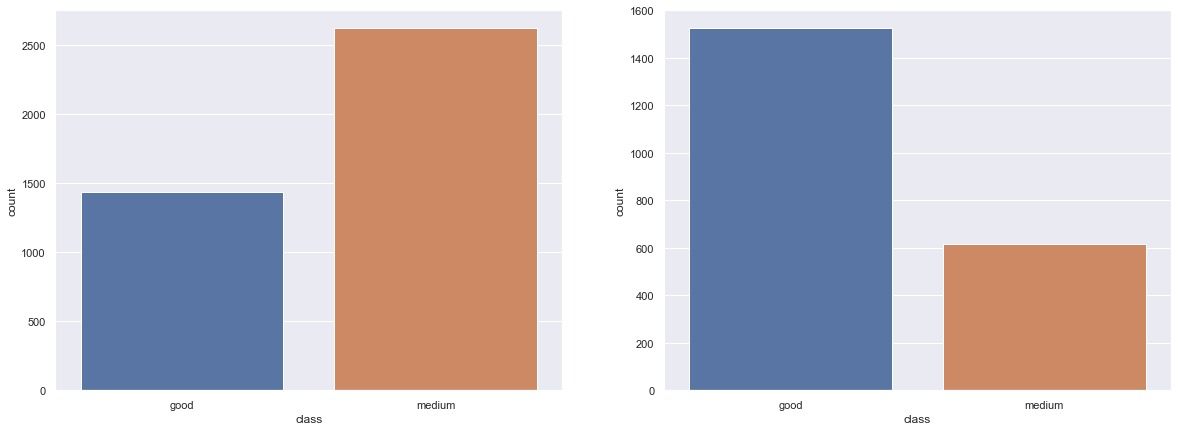

In [65]:
f, axes = plt.subplots(1, 2, figsize=(20, 7), sharex=True)
sns.countplot(x = 'class',data = df_train, ax=axes[0])
sns.countplot(x = 'class',data = df_ss, ax=axes[1])

In [129]:
from sklearn import preprocessing
df = df_train.copy()

labelencoders = {}
for o in df_train.select_dtypes('object').columns:
    labelencoders[o] = preprocessing.LabelEncoder()
    labelencoders[o].fit(df[o].unique())
    print('------------ '+o+' ------------')
    print(df[o].unique())
    print(labelencoders[o].transform(df[o].unique()))
print('------------------------')

# le = preprocessing.LabelEncoder()
# labels = df['class'].unique()
# print(labels)
# print(le.transform(labels))
# print(le.inverse_transform([0,1,2,3]))


------------ class ------------
['medium' 'good' 'poor' 'excellent']
[2 1 3 0]
------------ color ------------
['red' 'white']
[0 1]
------------ vineyard ------------
['E' 'C' 'D' 'A' 'B']
[4 2 3 0 1]
------------ chlor.class ------------
['e2' 'g1' 'e3' 'i2' 'd2' 'i1' 'd1' 'h1' 'f3' 'b2' 'i3' 'f1' 'c2' 'g3'
 'b1' 'e1' 'g2' 'f2' 'c1' 'b3' 'h3' 'h2' 'd3' 'c3']
[10 15 11 22  7 21  6 18 14  1 23 12  4 17  0  9 16 13  3  2 20 19  8  5]
------------ condition ------------
['I1' 'I2' 'S1' 'S2' 'S3' 'P1' 'P2' 'E']
[1 2 5 6 7 3 4 0]
------------------------


In [130]:
for o in df_train.select_dtypes('object').columns:
    df[o] = labelencoders[o].transform(df_train[o].values)


In [131]:
# df[o]

df.head()

,id,class,color,vineyard,fixed.acidity,acid.sulfur,volatile.acidity,sulfur.taste,citric.acid,residual.sugar,...,chlor.class,free.sulfur.dioxide,condition,total.sulfur.dioxide,density,pH,acid.taste,sulphates,acidity.variance,alcohol
0,1,2,0,4,9.5,3.559427,0.59,2.411605,0.44,2.3,...,10,21.0,1,68.0,0.99920,3.46,2.67,0.63,0.24,9.5
1,2,1,0,2,6.4,3.131123,0.57,1.752449,0.12,2.3,...,15,25.0,1,36.0,0.99519,3.47,2.09,0.71,0.24,11.3
2,3,1,1,2,6.3,2.893981,0.23,2.299379,0.33,6.9,...,11,23.0,2,118.0,0.99380,3.23,2.34,0.46,0.24,10.4
3,4,1,0,3,7.2,2.311189,0.37,2.293916,0.32,2.0,...,22,15.0,5,28.0,0.99470,3.23,1.67,0.73,0.24,11.3
4,5,2,1,4,5.9,3.185586,0.44,3.215821,0.33,1.2,...,7,12.0,1,117.0,0.99134,3.46,2.51,0.44,0.24,11.5


alcohol                -0.379473
color                  -0.101465
free.sulfur.dioxide    -0.078976
citric.acid            -0.072700
sulfur.taste           -0.036649
pH                     -0.033551
sulphates              -0.028867
acidity.variance       -0.027221
id                     -0.016626
chlor.class            -0.013276
condition               0.008383
vineyard                0.018006
residual.sugar          0.021089
acid.sulfur             0.023454
total.sulfur.dioxide    0.024315
acid.taste              0.034170
fixed.acidity           0.075804
chlorides               0.176626
density                 0.254921
volatile.acidity        0.262451
class                   1.000000
Name: class, dtype: float64


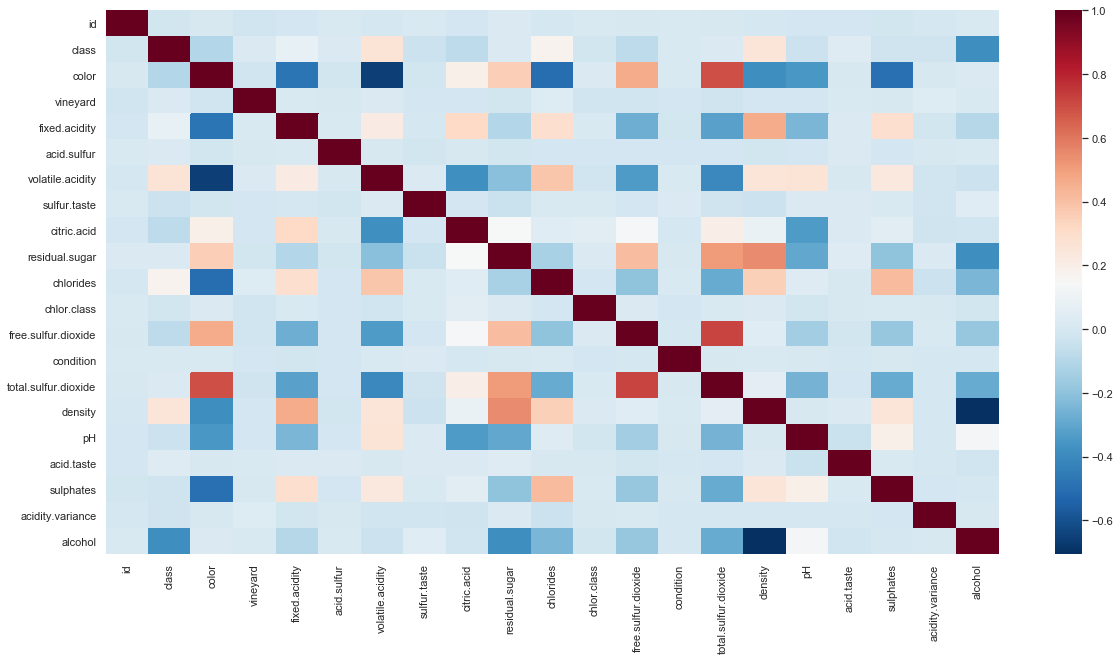

In [145]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c, cmap="RdBu_r")
print(c['class'].sort_values())

In [27]:
df_train.shape

(4355, 21)

In [28]:
df_train.count()

id                      4355
class                   4355
color                   4355
vineyard                4355
fixed.acidity           4355
acid.sulfur             4355
volatile.acidity        4355
sulfur.taste            4355
citric.acid             4355
residual.sugar          4355
chlorides               4355
chlor.class             4355
free.sulfur.dioxide     4355
condition               4355
total.sulfur.dioxide    4355
density                 4355
pH                      4355
acid.taste              4355
sulphates               4355
acidity.variance        4355
alcohol                 4355
dtype: int64

In [30]:
print(df_train.isnull().sum())

id                      0
class                   0
color                   0
vineyard                0
fixed.acidity           0
acid.sulfur             0
volatile.acidity        0
sulfur.taste            0
citric.acid             0
residual.sugar          0
chlorides               0
chlor.class             0
free.sulfur.dioxide     0
condition               0
total.sulfur.dioxide    0
density                 0
pH                      0
acid.taste              0
sulphates               0
acidity.variance        0
alcohol                 0
dtype: int64
